# 使用DBSCAN对环形数据做聚类分析
生成环形数据。使用DBSCAN模型对数据做聚类。使用K-Means模型对数据做聚类。对比K-Means和DBSCAN的聚类效果。


In [48]:
## 导入包
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics

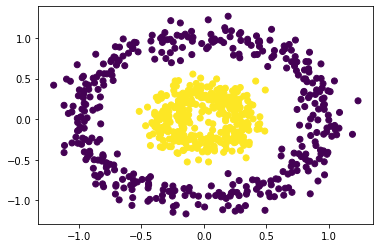

In [13]:
## 生成数据
X, Y = make_circles(n_samples=750, factor=0.3, noise=0.1, random_state=1)
plt.figure()
plt.scatter(X[:,0], X[:,1], c=Y)

## 使用DBSCAN进行聚类
```python
class sklearn.cluster.DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
```
- eps： DBSCAN算法参数，即我们的ϵ-邻域的距离阈值，和样本距离超过ϵ的样本点不在ϵ-邻域内。默认值是0.5.一般需要通过在多组值里面选择一个合适的阈值。eps过大，则更多的点会落在核心对象的ϵ-邻域，此时我们的类别数可能会减少， 本来不应该是一类的样本也会被划为一类。反之则类别数可能会增大，本来是一类的样本却被划分开。

- min_samples： DBSCAN算法参数，即样本点要成为核心对象所需要的ϵ-邻域的样本数阈值。默认值是5. 一般需要通过在多组值里面选择一个合适的阈值。通常和eps一起调参。在eps一定的情况下，min_samples过大，则核心对象会过少，此时簇内部分本来是一类的样本可能会被标为噪音点，类别数也会变多。反之min_samples过小的话，则会产生大量的核心对象，可能会导致类别数过少。

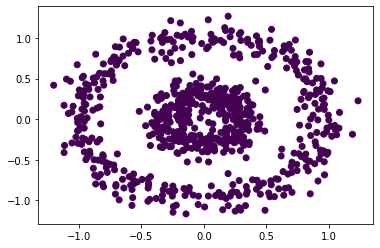

In [15]:
#设置不同参数进行聚类
def dbscan_plot(e,m):
    db=DBSCAN(eps=e,min_samples=m)
    y_pre=db.fit_predict(X)
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c=y_pre)
dbscan_plot(0.5,10)

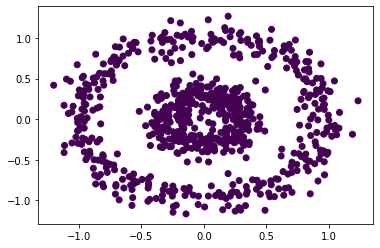

In [16]:
dbscan_plot(0.3,10)

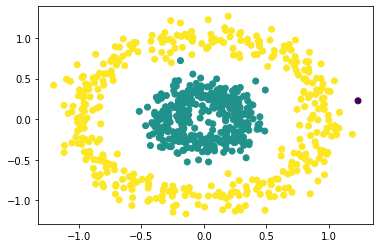

In [28]:
dbscan_plot(0.2,10)

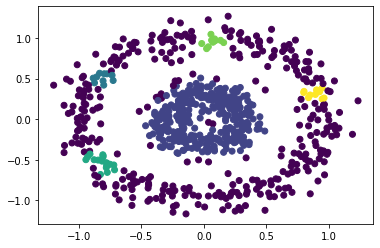

In [38]:
dbscan_plot(0.1,10)

### 以上结果说明，eps变小，类别数目会增多，将本来是一类的数据分开；但是eps变大，会使得本不是一类的点落到一起，类别数变少

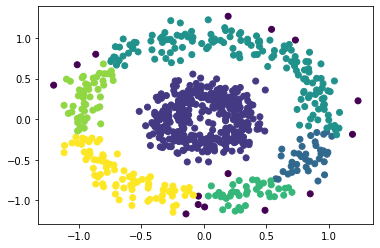

In [30]:
dbscan_plot(0.2,20)

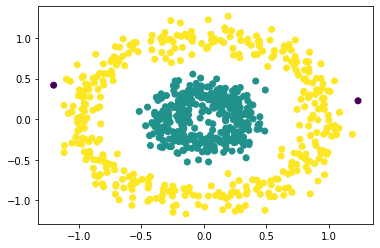

In [42]:
dbscan_plot(0.2,15)

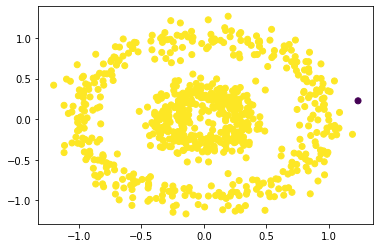

In [40]:
dbscan_plot(0.2,5)

### 以上结果说明，min_simples变小，会产生大量核心点导致类别数变少；min_simples变大，会导致核心点变少导致类别数变多

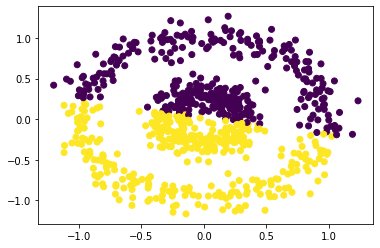

In [50]:
##使用K-Means聚类
kmeans = KMeans(n_clusters = 2, init = 'k-means++', n_init=10, max_iter=300, random_state = 0)
kmeans.fit(X)
y_pre_k = kmeans.predict(X)
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y_pre_k)

In [46]:
#选取最优参数进行BDSCAN
db=DBSCAN(eps=0.2,min_samples=15)
y_pre_db=db.fit_predict(X)

In [51]:
## 使用兰德指数对两种分类进行评估
print("DBSCAN的调整兰德指数是：%0.3f" % metrics.adjusted_rand_score(Y, y_pre_db))
print("K-Means的调整兰德指数是：%0.3f" % metrics.adjusted_rand_score(Y, y_pre_k))

DBSCAN的调整兰德指数是：0.995
K-Means的调整兰德指数是：0.000
